In [310]:
from google.colab import files
uploaded = files.upload()

Saving WA_Fn-UseC_-HR-Employee-Attrition.csv to WA_Fn-UseC_-HR-Employee-Attrition (2).csv


In [312]:
import pandas as pd

df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv', sep=',')

In [313]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


In [314]:
df.JobSatisfaction = df.JobSatisfaction.apply(lambda x: 0 if x <= 2 else 1)

In [315]:
X = pd.get_dummies(df, columns=['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime'])
y = X.JobSatisfaction
X = X.drop('JobSatisfaction', axis=1)
X

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_No,Attrition_Yes,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,5993,19479,8,11,3,1,80,0,8,0,1,6,4,0,5,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1
1,49,279,8,1,1,2,3,61,2,2,5130,24907,1,23,4,4,80,1,10,3,3,10,7,1,7,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0
2,37,1373,2,2,1,4,4,92,2,1,2090,2396,6,15,3,2,80,0,7,3,3,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1
3,33,1392,3,4,1,5,4,56,3,1,2909,23159,1,11,3,3,80,0,8,3,3,8,7,3,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1
4,27,591,2,1,1,7,1,40,3,1,3468,16632,9,12,3,4,80,1,6,3,3,2,2,2,2,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,1,2061,3,41,4,2,2571,12290,4,17,3,3,80,1,17,3,3,5,2,0,3,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0
1466,39,613,6,1,1,2062,4,42,2,3,9991,21457,4,15,3,1,80,1,9,5,3,7,7,1,7,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0
1467,27,155,4,3,1,2064,2,87,4,2,6142,5174,1,20,4,2,80,1,6,0,3,6,2,0,3,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1
1468,49,1023,2,3,1,2065,4,63,2,2,5390,13243,2,14,3,4,80,0,17,3,2,9,6,0,8,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0


In [ ]:
df.Department.unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [ ]:
df.DistanceFromHome.unique()

array([ 1,  8,  2,  3, 24, 23, 27, 16, 15, 26, 19, 21,  5, 11,  9,  7,  6,
       10,  4, 25, 12, 18, 29, 22, 14, 20, 28, 17, 13])

In [ ]:
df.EducationField.unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [ ]:
df.JobSatisfaction.value_counts()

1    901
0    569
Name: JobSatisfaction, dtype: int64

In [ ]:
df.groupby('JobSatisfaction').mean()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
JobSatisfaction,,,,,,,,,,,,,,,,,,,,,,,,,
0,36.950791,777.175747,9.147627,2.920914,1.0,1056.177504,2.753954,67.650264,2.745167,2.065026,6544.720562,14241.499121,2.855888,15.175747,3.159930,2.732865,80.0,0.794376,11.486819,2.827768,2.769772,7.047452,4.207381,2.258348,4.231986
1,36.906770,818.469478,9.220866,2.907880,1.0,1005.091010,2.701443,64.780244,2.720311,2.063263,6476.540511,14358.322974,2.590455,15.230855,3.149834,2.699223,80.0,0.793563,11.148724,2.781354,2.755827,6.983352,4.243063,2.143174,4.054384


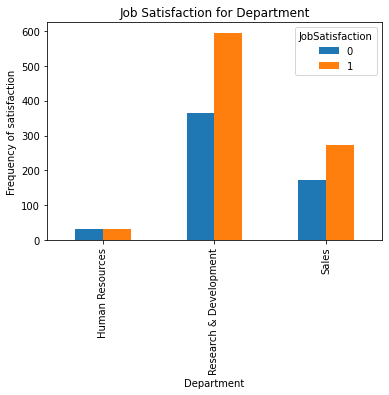

In [316]:
import matplotlib.pyplot as plt

%matplotlib inline
pd.crosstab(df.Department, df.JobSatisfaction).plot(kind='bar')
plt.title('Job Satisfaction for Department')
plt.xlabel('Department')
plt.ylabel('Frequency of satisfaction')
plt.savefig('job_satisfaction_and_department')

Департамент может стать важным признаком для прогноза удовлетворенности работой

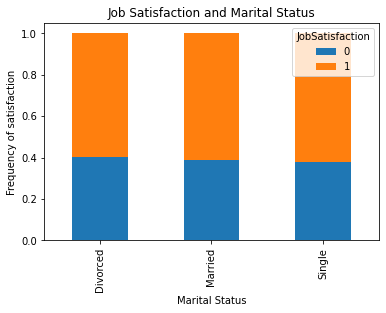

In [ ]:
table=pd.crosstab(df.MaritalStatus, df.JobSatisfaction)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked='True')
plt.title('Job Satisfaction and Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Frequency of satisfaction')
plt.savefig('job_satisfaction_and_marital_status')

Семейное положение не является существенным признаком

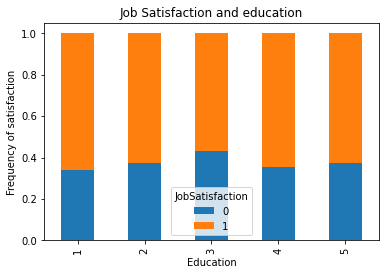

In [ ]:
table=pd.crosstab(df.Education, df.JobSatisfaction)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked='True')
plt.title('Job Satisfaction and Education')
plt.xlabel('Education')
plt.ylabel('Frequency of satisfaction')
plt.savefig('job_satisfaction_and_education')

Образование может являться хорошим фактором для прогноза

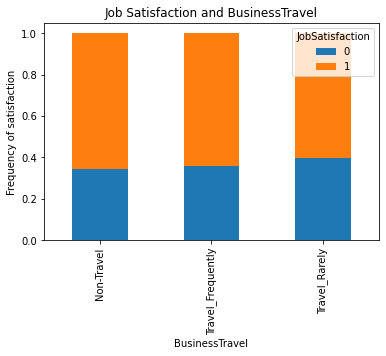

In [ ]:
table=pd.crosstab(df.BusinessTravel, df.JobSatisfaction)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked='True')
plt.title('Job Satisfaction and BusinessTravel')
plt.xlabel('BusinessTravel')
plt.ylabel('Frequency of satisfaction')
plt.savefig('job_satisfaction_and_business_travel')

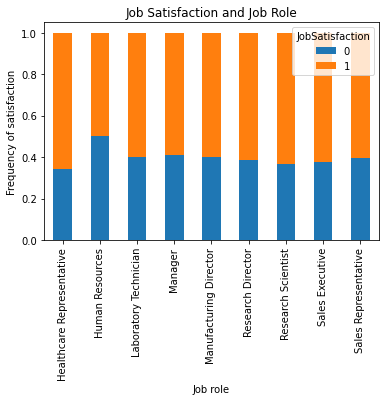

In [ ]:
table=pd.crosstab(df.JobRole, df.JobSatisfaction)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked='True')
plt.title('Job Satisfaction and Job Role')
plt.xlabel('Job role')
plt.ylabel('Frequency of satisfaction')
plt.savefig('job_satisfaction_and_job_role')

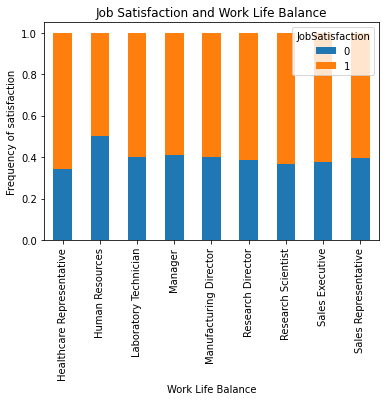

In [ ]:
able=pd.crosstab(df.WorkLifeBalance, df.JobSatisfaction)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked='True')
plt.title('Job Satisfaction and Work Life Balance')
plt.xlabel('Work Life Balance')
plt.ylabel('Frequency of satisfaction')
plt.savefig('job_satisfaction_and_work_life_balance')

In [317]:
from sklearn.linear_model import LogisticRegression

In [320]:
clf = LogisticRegression(penalty='l2')
clf.fit(X_train, y_train)
cross_val_score(clf, X_test, y_test, cv=5)

array([0.40540541, 0.56756757, 0.54054054, 0.5890411 , 0.53424658])

In [321]:
clf.coef_

array([[ 0.07523175,  0.08225496,  0.09959375,  0.03749807,  0.        ,
        -0.13690822, -0.08882284, -0.11357049, -0.0442747 ,  0.25496132,
        -0.21051569,  0.02150133, -0.06993952,  0.09839604, -0.11361234,
        -0.09130118,  0.        ,  0.07050432, -0.22039726, -0.0511699 ,
         0.03886405,  0.02104445,  0.17767141, -0.11963606, -0.14629002,
         0.13019427, -0.13019427, -0.00577734,  0.08455075, -0.06887673,
        -0.01022779,  0.05430843, -0.05170968, -0.0496272 ,  0.06902505,
        -0.14568207,  0.00312317, -0.00690243,  0.06699137, -0.05251921,
         0.05251921, -0.02709298, -0.01501783, -0.06043717,  0.11469792,
        -0.11665349, -0.01433315, -0.02849686,  0.12840967,  0.00480522,
        -0.12191099, -0.01447132,  0.12748916,  0.        , -0.0778957 ,
         0.0778957 ]])

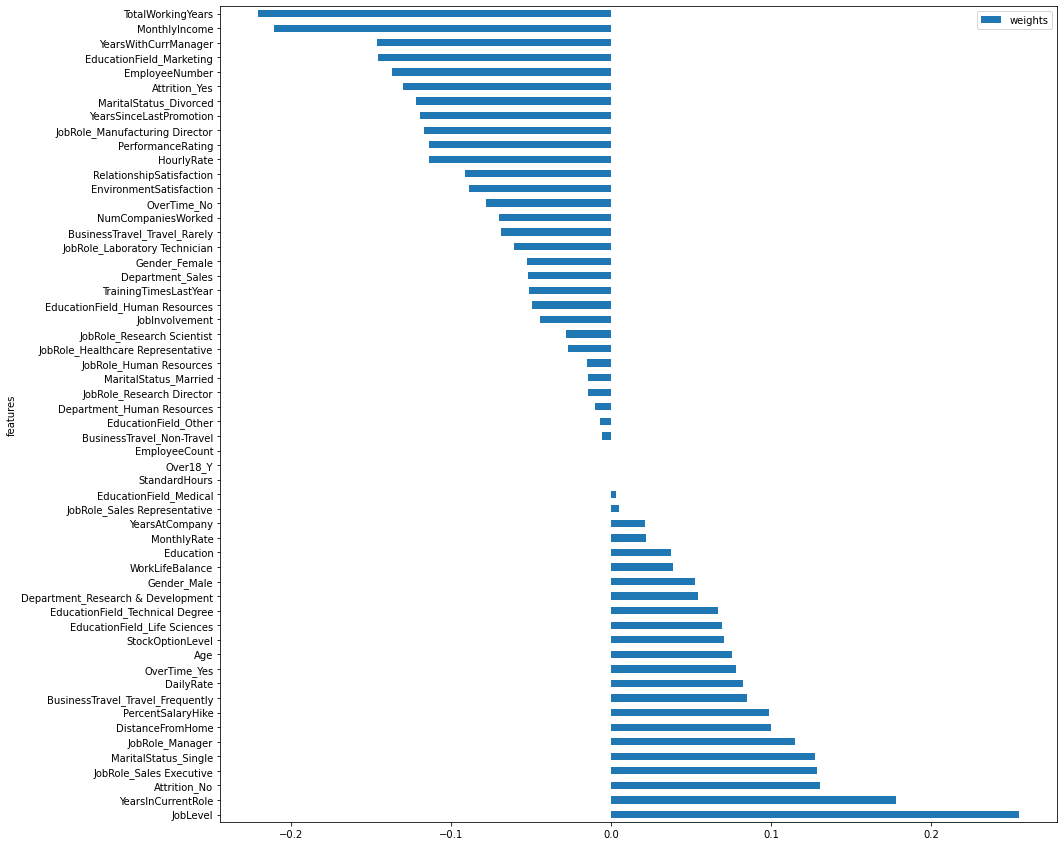

In [322]:
sorted_weights = sorted(zip(clf.coef_.ravel(), X.columns), reverse=True)
weights = [x[0] for x in sorted_weights]
features = [x[1] for x in sorted_weights]
df1 = pd.DataFrame({'features': features, 'weights': weights})
ax = df1.plot.barh(x='features', y='weights', rot=0, figsize=(15, 15))

Целью наших предсказаний является определение принадлежности целевой переменной к тому или иному классу (удовлетворенность работой или неудовлетворенность), значит, данная задача относится к типу классификации. Из коэффициентов видим, что, например, признак 'Over18' не является существенным, а JobLevel - важный фактор для построения предсказаний по нашей модели. Интересно, что у признака 'MonthlyIncome' отрицательный вес, поэтому возможно, что с ростом месячного дохода сотрудники больше склонны быть неудовлетворенными работой.

In [351]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split, GridSearchCV

In [324]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [325]:
estimator = DecisionTreeClassifier(criterion='entropy')
estimator.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [326]:
import graphviz

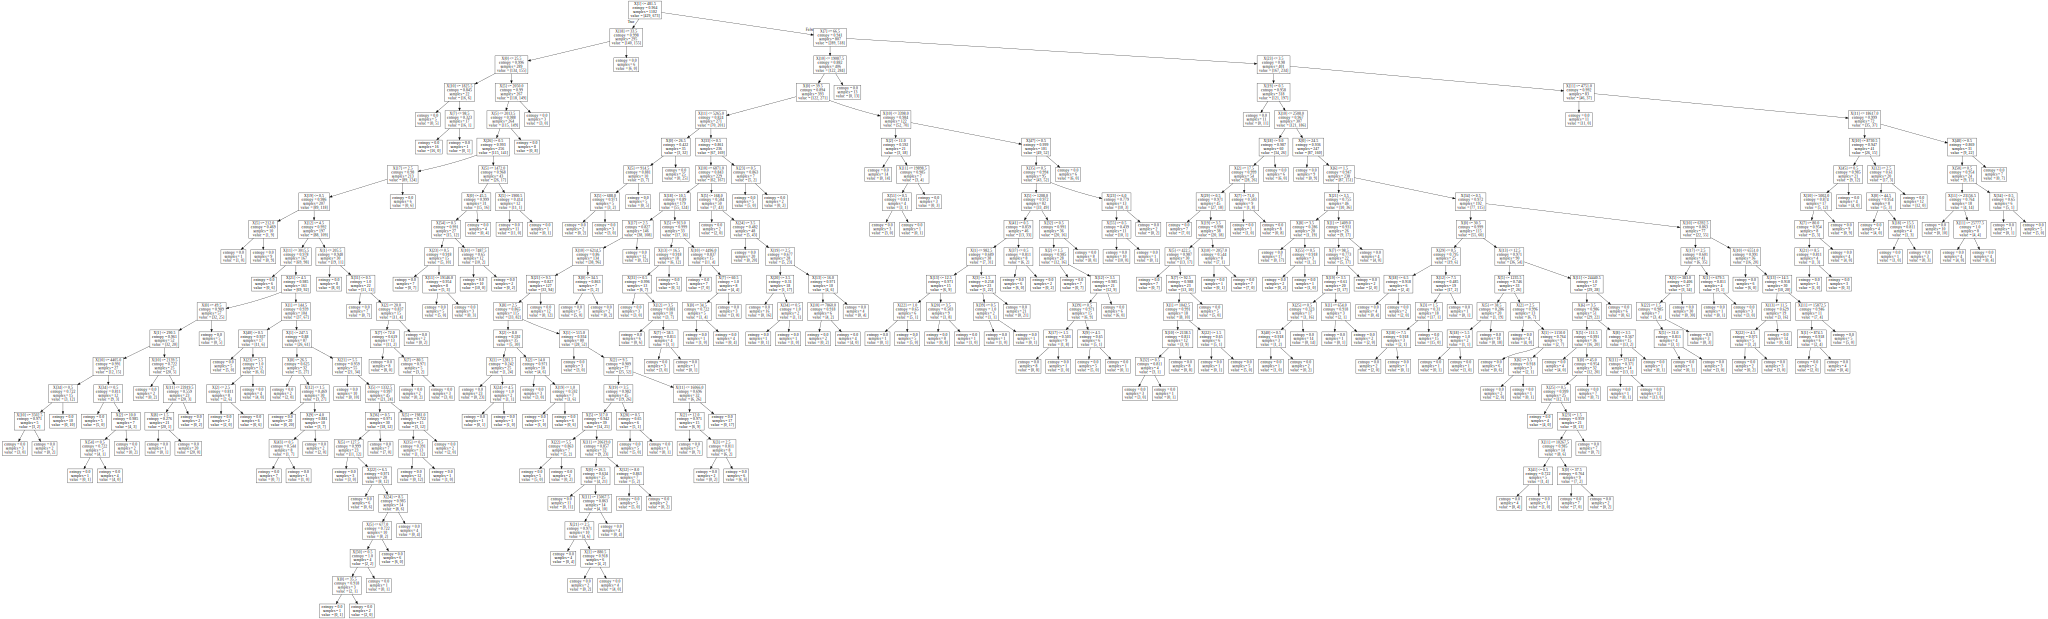

In [327]:
graphviz.Source(tree.export_graphviz(estimator))

In [348]:
from sklearn.ensemble import RandomForestClassifier

In [358]:
model = RandomForestClassifier(random_state=0)
param_grid = {'n_estimators': [30, 60, 90], 'max_depth': [3, 6, 9],
              'max_features': ['sqrt', 'log2'], 'min_samples_leaf': [1, 2]}

In [359]:
grid_= GridSearchCV(model, param_grid, cv = 3)
grid_.fit(X_train, y_train);

In [360]:
grid_.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=90,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [362]:
cross_val_score(RandomForestClassifier(max_depth=5, max_features='log2', n_estimators=30,
                       random_state=0), X_train, y_train, cv=5)

array([0.59276018, 0.59276018, 0.60909091, 0.58181818, 0.60454545])

In [364]:
X = df[['Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education', 'MonthlyIncome', 'EnvironmentSatisfaction', 'JobRole', 'TotalWorkingYears', 'WorkLifeBalance']]
y = df['JobSatisfaction']
X.isnull().sum()

Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
MonthlyIncome              0
EnvironmentSatisfaction    0
JobRole                    0
TotalWorkingYears          0
WorkLifeBalance            0
dtype: int64

Видим, что пропусков в данных нет

In [329]:
X.Attrition.unique()

array(['Yes', 'No'], dtype=object)

In [330]:
X.Attrition = X.Attrition.map({'Yes': 1, 'No': 0})

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [331]:
X.BusinessTravel.unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [332]:
X.BusinessTravel = X.BusinessTravel.map({'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently':2})

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [333]:
X.JobRole.unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

In [334]:
X = pd.get_dummies(X, columns=['JobRole'])

In [335]:
X.Department.unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [336]:
X = pd.get_dummies(X, columns=['Department'])

In [337]:
X

,Attrition,BusinessTravel,DistanceFromHome,Education,MonthlyIncome,EnvironmentSatisfaction,TotalWorkingYears,WorkLifeBalance,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,Department_Human Resources,Department_Research & Development,Department_Sales
0,1,1,1,2,5993,2,8,1,0,0,0,0,0,0,0,1,0,0,0,1
1,0,2,8,1,5130,3,10,3,0,0,0,0,0,0,1,0,0,0,1,0
2,1,1,2,2,2090,4,7,3,0,0,1,0,0,0,0,0,0,0,1,0
3,0,2,3,4,2909,4,8,3,0,0,0,0,0,0,1,0,0,0,1,0
4,0,1,2,1,3468,1,6,3,0,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,2,23,2,2571,3,17,3,0,0,1,0,0,0,0,0,0,0,1,0
1466,0,1,6,1,9991,4,9,3,1,0,0,0,0,0,0,0,0,0,1,0
1467,0,1,4,3,6142,2,6,3,0,0,0,0,1,0,0,0,0,0,1,0
1468,0,2,2,3,5390,4,17,2,0,0,0,0,0,0,0,1,0,0,0,1


In [338]:
from sklearn.preprocessing import StandardScaler

In [339]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [340]:
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [341]:
def logistic_function(x):
  return 1/(1 + np.exp(-x))

In [342]:
import numpy as np

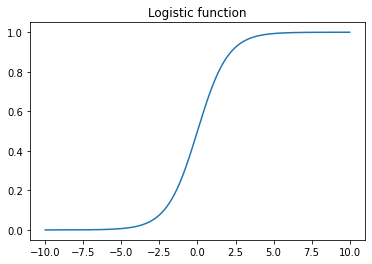

In [343]:
x = np.linspace(-10, 10, 1000)
plt.plot(x, logistic_function(x))
plt.title('Logistic function')
plt.show()

In [344]:
predict_proba = clf.predict_proba(X_test)[:,1]
np.mean(clf.predict(X_test) == y_test)

0.592391304347826

In [345]:
from sklearn.metrics import accuracy_score

In [346]:
accuracy_score(y_test, clf.predict(X_test))

0.592391304347826

In [347]:
np.mean(y_test[(predict_proba > 0.55) & (predict_proba < 0.65)])

0.6237623762376238